# **CS412 - Machine Learning - 2022**
## Homework 1
100 pts


## **Goal**

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with the Sklearn library
*   Learn which evaluation metric to choose in different scenarios

## **Dataset**
**JOB-A-THON - March 2022** Dataset contains the customer demographics and past activity with the bank. There is also the target label representing whether the customer will churn (stop working with the bank) or not.

Dataset is taken from: https://www.kaggle.com/datasets/gauravduttakiit/jobathon-march-2022

**Download the data from SuCourse**

## **Task**
Build a kNN and decision tree classifiers with the scikit library function calls to predict customer churn. Is_Churn is the target variable while the others will be used as features ('Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category').

## **Software**: You may find the necessary function references here:
http://scikit-learn.org/stable/supervised_learning.html

## **Submission**: 
Name this notebook as: **YourName_Surname_hw1.ipynb** from the top left corner (e.g. for Özgür Can Seçkin -> Ozgur_Can_Seckin_hw1.ipynb)
Next, download this notebook as a *.ipynb document and upload* it on SuCourse. Also, click on the **"Share"** button on the top right hand side of the page and swicth from **"restricted" to "Anyone with the Link"** under the **"Get Link"** title. Then, **copy the link and paste it on the assignment's comment.**

If necessary, see the first recitation under Week 4 to get a tutorial on how to share your Colab link and how to download the .ipynb file.

## **Provide the Colab Link Here**:
https://colab.research.google.com/.....

##**1) Initialize**

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


##**2) Load training dataset** *(5 pts)*

Read the csv file:



In [2]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np

# Load our data using pandas

# Read data
df = pd.read_csv('/content/train_hw1.csv')


##**3) Understanding the dataset** *(5 pts)*

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***(shape function can be used)***

- Get a quick summary of the data **(info can be used)**

- Display the first 5 rows from training dataset ***(head or sample functions can be used)***


Note: Understanding the features, possibly removing some features etc. is an important part in building an ML system.


In [3]:
# print shape
ATT = df.columns
# Let's print the shape of the dataframe to see how many rows and columns are there
ATT2 = df.shape
print('Data Dimensionality: ', "\n", "\n" , " Label of Columns =  ", ATT , "\n", "\n" , " Number of Rows and Columns = " , ATT2, "\n")



# print the summary for each column
SUM = df.describe(include='all')
print('Data Summary: ', "\n" , "\n" , SUM, "\n")
df.info()

# print first 5 rows in your dataset

# head function prints the first 5 rows from the dataframe
print("\n", 'Head of Data: ', "\n" , "\n")
df.head(5)





Data Dimensionality:  
 
  Label of Columns =   Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn'],
      dtype='object') 
 
  Number of Rows and Columns =  (6650, 11) 

Data Summary:  
 
               ID          Age Gender     Income       Balance      Vintage  \
count       6650  6650.000000   6650       6650  6.650000e+03  6650.000000   
unique      6650          NaN      2          4           NaN          NaN   
top     84e2fcc9          NaN   Male  10L - 15L           NaN          NaN   
freq           1          NaN   3612       1885           NaN          NaN   
mean         NaN    41.130226    NaN        NaN  8.045954e+05     2.250226   
std          NaN     9.685747    NaN        NaN  5.157549e+05     1.458795   
min          NaN    21.000000    NaN        NaN  6.300000e+01     0.000000   
25%          NaN    34.000000    NaN        NaN  3.922642e+05     1.000000

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


##**4) Seperate X and y Values** *(5 pts)*
First, you have to seperate X (features or independent variables) from y (target variable or dependent variables).

Note that our **dependent variable** is *'Is_Churn'* while the **independent variables** are: *'Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category'*

*Hint: You can use drop method when defining X*

In [4]:
# Drop ID column:
df = df.drop(columns=['ID'])

# Define X:
X = df[['Age', 'Gender', 'Income',
        'Balance', 'Vintage', 'Transaction_Status',
        'Product_Holdings', 'Credit_Card', 'Credit_Category']]

# Define y:
y = df['Is_Churn']


In [5]:
X

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor
4,39,Female,More than 15L,893146.23,1,1,1,1,Good
...,...,...,...,...,...,...,...,...,...
6645,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor
6646,42,Female,5L - 10L,596286.54,3,1,2,1,Average
6647,29,Male,Less than 5L,979298.19,2,0,2,0,Poor
6648,66,Female,10L - 15L,395233.65,3,0,2,1,Poor


In [6]:
y

0       1
1       0
2       0
3       1
4       1
       ..
6645    1
6646    0
6647    0
6648    1
6649    0
Name: Is_Churn, Length: 6650, dtype: int64

##**5) Train - Test Split** *(5 pts)*
Since you will be going to apply cross validation, you do not need to use a validation set for now.

In [7]:
from sklearn.model_selection import train_test_split

# Split 80-20

# 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(" Length of training set:", len(y_train), "\n", 
      "Length of test set: ", len(y_test))


 Length of training set: 5320 
 Length of test set:  1330


##**6) Transform Features Into Numerical Format** *(10 pts)*
You can take:
*   Gender information as a binary variable
*   Income and Credit_Category as ordinal variables

The dictionaries that you are going to use are given below:

In [8]:
gender_map = {'Female':1, 'Male': 0}

Income_map = {'Less than 5L': 1, 
              '5L - 10L': 2,
              '10L - 15L': 3,
              'More than 15L': 4}
              
Credit_Category_map = {'Poor': 1,
                       'Average': 2,
                       'Good': 3}

Product_Holdings_map = {'3+': 3}


# You can use replace method to replace the values on training and test sets:

# I've already used these and the array is arranged accordingly
X_train.Gender = X_train.Gender.apply(lambda x: 1 if x=='Female' else 0)
X_test.Gender = X_test.Gender.apply(lambda x: 1 if x=='Female' else 0)
GEN = X_train.Gender.unique()

print(" For gender = ", GEN)

IC = X_train.Income.unique()

#I've already used these and the array is arranged accordingly
X_train["Income"] = X_train["Income"].replace(Income_map)
X_test["Income"] = X_test["Income"].replace(Income_map)
IC = X_train.Income.unique()

print(" For Income = ", IC)


CC = X_train.Credit_Category.unique()

#I've already used these and the array is arranged accordingly
X_train["Credit_Category"] = X_train["Credit_Category"].replace(Credit_Category_map)
X_test["Credit_Category"] = X_test["Credit_Category"].replace(Credit_Category_map)
CC = X_train.Credit_Category.unique()

print(" For Credit Category = ", CC)

PH = X_train.Product_Holdings.unique()

#I've already used these and the array is arranged accordingly
X_train["Product_Holdings"] = X_train["Product_Holdings"].replace(Product_Holdings_map)
X_test["Product_Holdings"] = X_test["Product_Holdings"].replace(Product_Holdings_map)
PH = X_train.Product_Holdings.unique()

print(" For Product Holdings = ", PH)




 For gender =  [1 0]
 For Income =  [2 1 4 3]
 For Credit Category =  [1 2 3]
 For Product Holdings =  ['1' '2' 3]


In [10]:
X_train.head(10)

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
3759,31,1,2,810212.13,5,0,1,1,1
2728,37,1,1,480472.92,2,1,2,0,2
1632,30,0,2,700588.71,1,0,2,1,1
555,66,0,4,559805.67,3,1,2,1,3
4577,41,0,3,856706.13,3,1,2,1,1
3126,37,0,2,1047398.94,0,1,2,1,3
5465,42,1,1,1421413.47,1,0,2,1,1
4726,43,1,4,946563.84,3,0,1,0,1
1272,42,1,3,879507.27,0,1,1,1,2
6224,34,0,3,647110.89,2,1,2,1,3


In [11]:
y_train.head(10)

3759    0
2728    0
1632    0
555     0
4577    0
3126    0
5465    0
4726    0
1272    0
6224    1
Name: Is_Churn, dtype: int64

##**7) Select the Best Evaluation Metric** *(25 pts)*
Since our bank is very risk averse, it tries to minimize the number of credits that we call "good" but actually are "bad".

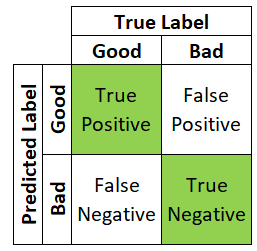

Which of the following performance metric should we employ in order to select the best model? (You can use the table above) Please write down the correct answer below (under **YOUR ANSWER HERE**) and explain your reasoning in one or two sentences.

1.   Accuracy
2.   Precision
3.   Recall

### YOUR ANSWER HERE:
We choose to use Precision (True Positive / (True Positive + False Positive ))  because We need to minimize false positives. We also need to maximize the real good in the predicted good and minimize the real bad in the predicted good. Therefore, precision should be a good performance measure. Higher precision, minimum desired output.



##**8) Train a decision tree classifier on train data and do model selection using the validation data** *(30 pts)*

* Set number of folds in cross validation as 5 *(5 pts)*
* Set scoring parameter to what you have determined in the last question as `scoring = '...'` *(5 pts)*
* Use grid_search to apply hyperparameter tuning on decision tree classifier with max_depth = 3, 5, 7, 9, 11 *(10 pts)*
* Plot the validation set performance metrics for these settings where x axis denotes the max_depth values and validation performance metrics are on y axis. *(10 pts)*

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Mean Validation Precision Score')

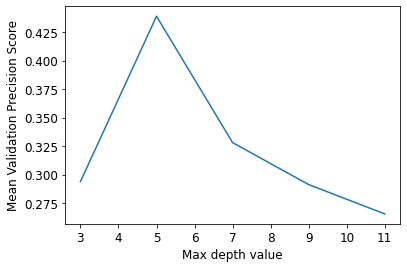

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


# Train decision tree classifiers
param_grid = {'max_depth' : [3, 5, 7, 9, 11]}
DTC = DecisionTreeClassifier()
grid = GridSearchCV(DTC,
                    param_grid,
                    cv=5,
                    scoring='precision',
                    return_train_score=False,
                    verbose = 1,
                    refit = True)


grid_search = grid.fit(X_train, y_train)


# Plot errors
import matplotlib.pyplot as plt
plt.plot(param_grid['max_depth'],
         grid_search.cv_results_['mean_test_score'])
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.xlabel('Max depth value', fontsize = 12)
plt.ylabel('Mean Validation Precision Score',fontsize = 12)



In [13]:
grid_search.cv_results_

{'mean_fit_time': array([0.00858316, 0.00983067, 0.01224108, 0.01416235, 0.0154614 ]),
 'mean_score_time': array([0.00394325, 0.00347486, 0.00367866, 0.00377703, 0.00351377]),
 'mean_test_score': array([0.29375   , 0.43892325, 0.32799952, 0.29114199, 0.26540573]),
 'param_max_depth': masked_array(data=[3, 5, 7, 9, 11],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3},
  {'max_depth': 5},
  {'max_depth': 7},
  {'max_depth': 9},
  {'max_depth': 11}],
 'rank_test_score': array([3, 1, 2, 4, 5], dtype=int32),
 'split0_test_score': array([0.46875   , 0.39285714, 0.34042553, 0.27777778, 0.31404959]),
 'split1_test_score': array([0.5       , 0.4516129 , 0.28571429, 0.26851852, 0.224     ]),
 'split2_test_score': array([0.        , 0.44736842, 0.33333333, 0.30275229, 0.27272727]),
 'split3_test_score': array([0.        , 0.44444444, 0.35849057, 0.29896907, 0.26415094]),
 'split4_test_score': array([0.5      

In [14]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5)

##**9) Evaluate the Best Classifier on Test Set** *(15 pts)*

- Predict the labels of testing data. **Note that grid search cv function will return you the best estimator, so you can use directly the fitted function to make your predictions** and report the accuracy. 

In [15]:
# test prediction using a decision tree with all default parameters and ..... min-split value 

predictions = grid_search.predict(X_test)


# Report your accuracy
from sklearn.metrics import accuracy_score, precision_score # you can find your scoring metric (precision_score) in this library
TestAccuracy = accuracy_score(y_test,predictions)
TestPrecisionScore=precision_score(y_test,predictions)

print("Testing Accuracy = %.5f%%" % (TestAccuracy * 100))
print("Testing Precision Score = %.5f%%" % (TestPrecisionScore * 100))


Testing Accuracy = 75.63910%
Testing Precision Score = 42.00000%


##**10) Submission**

Name this notebook as: **YourName_Surname_hw1.ipynb** from the top left corner (e.g. for Özgür Can Seçkin -> Ozgur_Can_Seckin_hw1.ipynb)
Next, download this notebook as a *.ipynb document and upload* it on SuCourse. Also, click on the **"Share"** button on the top right hand side of the page and swicth from **"restricted" to "Anyone with the Link"** under the **"Get Link"** title. Then, **copy the link and paste it on the assignment's comment.**

If necessary, see the first recitation under Week 4 to get a tutorial on how to share your Colab link and how to download the .ipynb file.

## Questions? 

You can and should ask all your Google Colab related questions under Forums  and feel free to answer/share your answer regarding Colab. 

You can also ask/answer about which functions to use and what libraries... 

However you should **not ask** about the core parts, that is what is validation/test, which one shd. have higher performance, what are your scores etc.
